<a href="https://colab.research.google.com/github/AutumnDilks/CS4410/blob/main/CS4410_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
#Ex 16.1 and 16.4 on page 715. The questions and answers to 16.1 is under code line 299, 16.4 is under code line 293

In [272]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(font_scale=2)





from tensorflow.keras.datasets import fashion_mnist 

#from tensorflow.keras.datasets import mnist

In [273]:
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data() 

#(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [274]:
X_train.shape

(60000, 28, 28)

In [275]:
y_train.shape

(60000,)

In [276]:
X_test.shape

(10000, 28, 28)

In [277]:
y_test.shape 

(10000,)

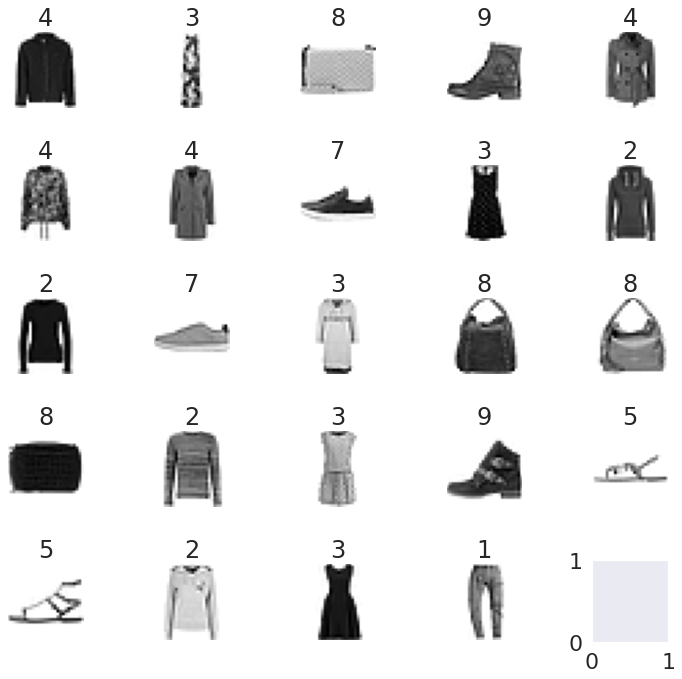

In [278]:
from matplotlib import image
#pg679
import numpy as np 

i=np.random.choice(np.arange(len(X_train)),24,replace=False) 
figure,axes=plt.subplots(nrows=5,ncols=5,figsize=(10,10)) 

for item in zip(axes.ravel(),X_train[i],y_train[i]):
    axes,image,target=item 
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([]) 
    axes.set_title(target)
plt.tight_layout()


In [279]:
X_train = X_train.reshape((60000,28,28,1)) # reshaping image pg 680

X_test = X_test.reshape((10000,28,28,1))

In [280]:
X_train.shape 

(60000, 28, 28, 1)

In [281]:
X_test.shape

(10000, 28, 28, 1)

In [282]:
#from re import X
#normalizing image data pg681 

X_train = X_train.astype('float32')/255 

X_test = X_test.astype('float32')/255 

In [283]:
#682 converting labels from int to categorical data 

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train)

In [284]:
y_train.shape

(60000, 10)

In [285]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [286]:
y_test=to_categorical(y_test)

In [287]:
y_test.shape

(10000, 10)

In [288]:
#682, creating neural network and adding layers to the network 

from tensorflow.keras.models import Sequential 
cnn= Sequential()

In [289]:
from tensorflow.keras.layers import Conv2D, Dense,Flatten,MaxPooling2D

In [290]:
#684 adding convolution layer 

cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

In [291]:
 #686 adding a pooling layer 
 cnn.add(MaxPooling2D(pool_size=(2,2)))

In [292]:
#Adding another pooling layer and convolution layer 

#687
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu')) # adjust , when run all it works,why? 

cnn.add(MaxPooling2D(pool_size=(2,2)))

In [293]:
#flattening 
cnn.add(Flatten()) 

16.4 add another dense layer with 4096 units/neurons before the other dense layers

The number of incorrect predictions increases with the code and accuracy goes down. 

In [294]:
#16.4 add another dense layer with 4096 units/neurons before the other dense layers 


#cnn.add(Dense(units=4096,activation='softmax')) 

In [295]:
#adding a Dense layer 
cnn.add(Dense(units=128,activation='relu'))

In [296]:
#adding another Dense layer 

cnn.add(Dense(units=10,activation='softmax')) 



In [297]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3200)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

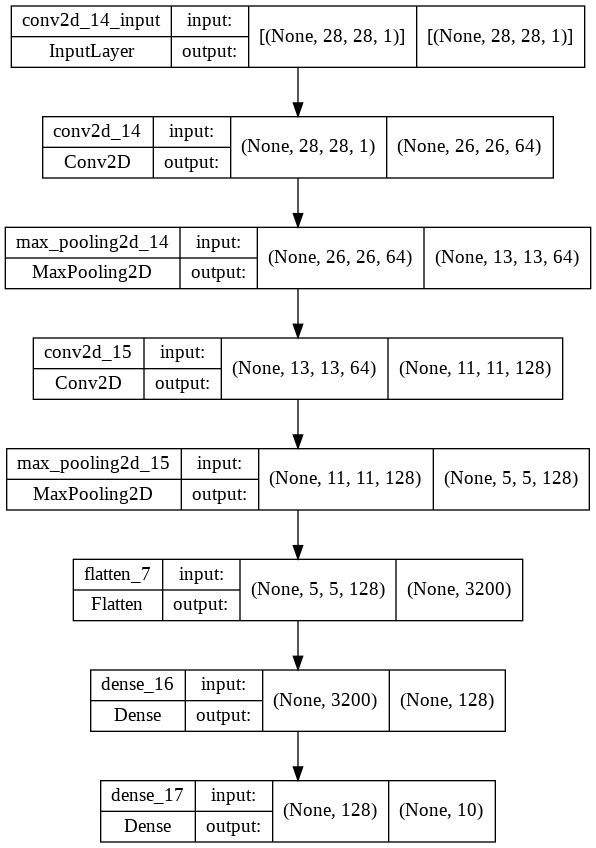

In [298]:
# 688 visualizing a model's stucture 

from tensorflow.keras.utils import plot_model 
from IPython.display import Image 

plot_model(cnn,to_file='convnet.png',show_shapes=True,show_layer_names=True) 

Image(filename='convnet.png')

In [299]:


cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Ex 16.1 on page 715. (book slide 16_06.ipynb is a good reference). 

**how well does the model perform on Fashin-MNIST compared to MNIST? ** 

MNist : 4s 12ms/step - loss: 0.0347 - accuracy: 0.9895 
Fashin-MNIST : 4s 11ms/step - loss: 0.2668 - accuracy: 0.8999

**How do the training times compare? ** 

MNist : 68 to 69s  
Fashin-MNIST : 69-71s


In [300]:
#691 training and evaluating the model 

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1) 

Epoch 1/5
844/844 [==============================] - 71s 84ms/step - loss: 0.4679 - accuracy: 0.8309 - val_loss: 0.3381 - val_accuracy: 0.8737
Epoch 2/5
844/844 [==============================] - 70s 83ms/step - loss: 0.3068 - accuracy: 0.8890 - val_loss: 0.2948 - val_accuracy: 0.8915
Epoch 3/5
844/844 [==============================] - 69s 81ms/step - loss: 0.2606 - accuracy: 0.9046 - val_loss: 0.2641 - val_accuracy: 0.9025
Epoch 4/5
844/844 [==============================] - 70s 82ms/step - loss: 0.2248 - accuracy: 0.9175 - val_loss: 0.2507 - val_accuracy: 0.9060
Epoch 5/5
844/844 [==============================] - 70s 83ms/step - loss: 0.1994 - accuracy: 0.9252 - val_loss: 0.2512 - val_accuracy: 0.9065


In [301]:
#evaluating the model 692 

loss,accuracy = cnn.evaluate(X_test,y_test) #does not run

313/313 [==============================] - 4s 11ms/step - loss: 0.2668 - accuracy: 0.8999


In [302]:
loss

0.26677024364471436

In [303]:
accuracy

0.8999000191688538

In [304]:
#pg.693 predictions  

predictions = cnn.predict(X_test)

In [305]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [306]:
for i,probability in enumerate(predictions[0]): 
    print(f'{i}: {probability:.10%}')

0: 0.0000025059%
1: 0.0000032438%
2: 0.0001126711%
3: 0.0000001019%
4: 0.0000096419%
5: 0.0640269660%
6: 0.0000088123%
7: 0.0100489888%
8: 0.0000092199%
9: 99.9257743359%


In [307]:
images = X_test.reshape((10000,28,28)) 
incorrect_predictions = [] 

for i,(p,e) in enumerate(zip(predictions,y_test)):
    predicted, expected = np.argmax(p), np.argmax(e) 

    if predicted != expected: 
        incorrect_predictions.append((i,images[i],predicted,expected))

In [308]:
len(incorrect_predictions)

1001

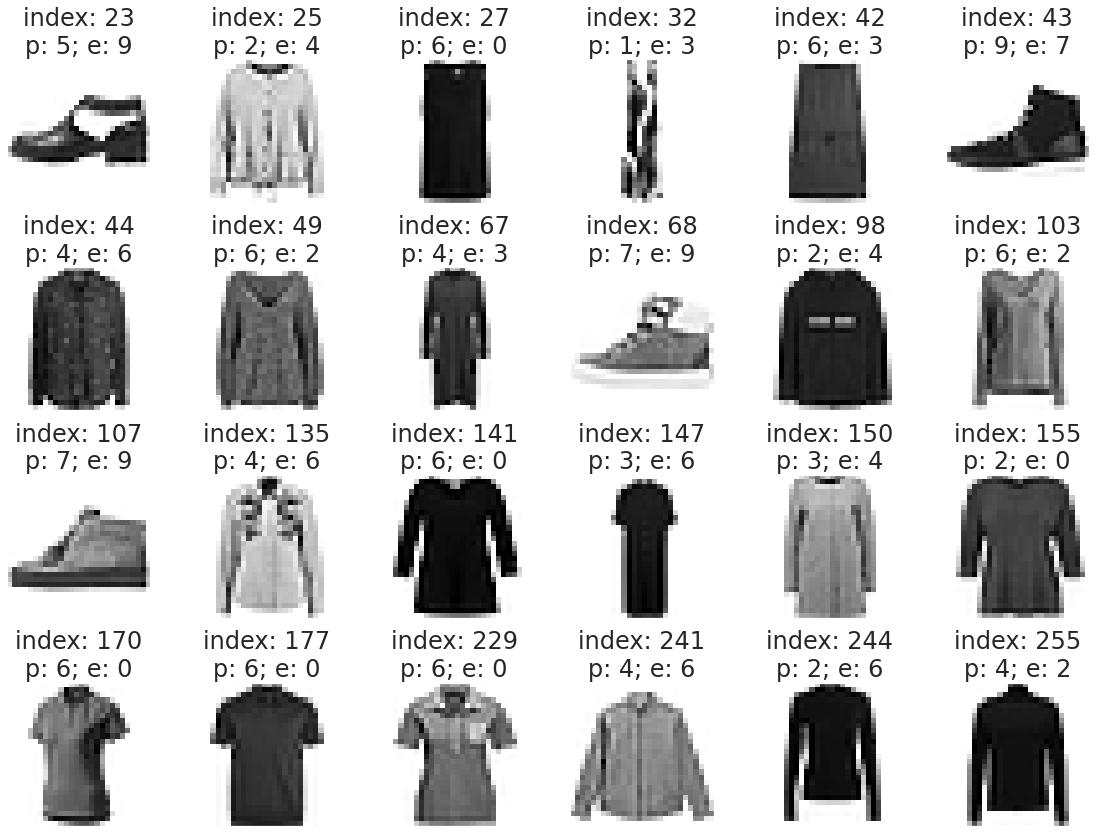

In [309]:
figure,axes = plt.subplots(nrows=4,ncols=6,figsize=(16,12)) 

for axes, item in zip(axes.ravel(),incorrect_predictions):
    i,image,predicted,expected = item 
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([]) 
    axes.set_title(f'index: {i}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [310]:
def display_probabilities(prediction): 
  for i, probability in enumerate(prediction):
    print(f'{i}: {probability:.10%}')

In [311]:
display_probabilities(predictions[495])

0: 0.0001712436%
1: 0.0000028304%
2: 0.0003037092%
3: 0.0000055097%
4: 0.0000801504%
5: 15.4936030507%
6: 0.0000138267%
7: 0.0037108126%
8: 0.0000520843%
9: 84.5020592213%


In [312]:
display_probabilities(predictions[583])

0: 0.0000000248%
1: 0.0000000069%
2: 0.0000007514%
3: 0.0000000632%
4: 0.0000000819%
5: 0.0000297088%
6: 0.0000002370%
7: 0.0208106139%
8: 0.0000021804%
9: 99.9791562557%


In [313]:
display_probabilities(predictions[625])

0: 96.2767302990%
1: 0.0000234999%
2: 0.1319838571%
3: 0.0225048119%
4: 0.0013285458%
5: 0.0000492507%
6: 3.5672262311%
7: 0.0000044590%
8: 0.0001057965%
9: 0.0000286689%
